In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in greater")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in less")

In [2]:
df = pd.read_csv('/kaggle/input/users-vs-bots-classification/bots_vs_users.csv')

In [3]:
df.shape

(5874, 60)

In [4]:
df.columns

Index(['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall',
       'can_send_message', 'has_website', 'gender', 'has_short_name',
       'has_first_name', 'has_last_name', 'access_to_closed_profile',
       'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name',
       'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music', 'can_add_as_friend',
       'can_invite_to_group', 'subscribers_count', 'is_blacklisted',
       'has_career', 'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbe

In [5]:
df.dtypes

has_domain                     object
has_birth_date                 object
has_photo                      object
can_post_on_wall               object
can_send_message               object
has_website                    object
gender                         object
has_short_name                 object
has_first_name                 object
has_last_name                  object
access_to_closed_profile       object
is_profile_closed              object
target                          int64
has_nickname                   object
has_maiden_name                object
has_mobile                     object
all_posts_visible              object
audio_available                object
has_interests                  object
has_books                      object
has_tv                         object
has_quotes                     object
has_about                      object
has_games                      object
has_movies                     object
has_activities                 object
has_music   

In [6]:
df.describe()

,target,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness
count,5874.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,0.500000,18.629044,19.552487,0.156463,0.143918,7.730661,544.752035,0.895945,0.610812,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009
std,0.500043,4.231994,41.954881,0.202730,0.187085,11.278711,746.728130,0.170084,2.461709,0.397830,0.033136,1617.635460,154.970296,0.009545,0.229815
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.400000,0.000000,0.000000,1.100000,86.600000,0.850000,0.000000,0.050000,0.000000,9.125000,1.980000,0.000000,0.580000
50%,0.500000,20.000000,7.600000,0.100000,0.050000,3.400000,267.800000,0.950000,0.000000,0.300000,0.000000,268.950000,30.950000,0.000000,0.710000
75%,1.000000,20.000000,26.075000,0.200000,0.200000,7.850000,616.850000,1.000000,0.200000,0.900000,0.000000,746.050000,89.480000,0.000000,0.830000
max,1.000000,20.000000,894.900000,1.000000,1.000000,61.600000,5841.250000,1.000000,64.050000,1.000000,0.950000,41415.700000,2866.590000,0.300000,1.000000


In [7]:
df.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


# Data Cleaning

## Column data type management

I notice that in the quick review that I gave to the data, there are columns of object type that should actually be numerical which contain null values represented with a text 'Unknown' instead of a NaN.

let's get all the columns of object type to be able to validate them

In [8]:
object_cols = df.select_dtypes(include='object').columns

Let's see which of these columns should be numeric and which should remain as object type

In [9]:
for col in object_cols:
    print(f'\n{col} Unique Values:\n {df[col].unique()[:10]}')


has_domain Unique Values:
 ['1.0' 'Unknown']

has_birth_date Unique Values:
 ['1.0' 'Unknown']

has_photo Unique Values:
 ['0.0' '1.0' 'Unknown']

can_post_on_wall Unique Values:
 ['0.0' '1.0' 'Unknown']

can_send_message Unique Values:
 ['0.0' '1.0' 'Unknown']

has_website Unique Values:
 ['0.0' 'Unknown' '1.0']

gender Unique Values:
 ['1.0' '2.0' '0.0' 'Unknown']

has_short_name Unique Values:
 ['1.0' 'Unknown']

has_first_name Unique Values:
 ['1.0' 'Unknown']

has_last_name Unique Values:
 ['1.0' 'Unknown' '0.0']

access_to_closed_profile Unique Values:
 ['1.0' '0.0' 'Unknown']

is_profile_closed Unique Values:
 ['0.0' '1.0' 'Unknown']

has_nickname Unique Values:
 ['Unknown' '0.0' '1.0']

has_maiden_name Unique Values:
 ['Unknown' '0.0' '1.0']

has_mobile Unique Values:
 ['Unknown' '1.0' '0.0']

all_posts_visible Unique Values:
 ['Unknown' '1.0' '0.0']

audio_available Unique Values:
 ['Unknown' '1.0' '0.0']

has_interests Unique Values:
 ['Unknown' '0.0' '1.0']

has_books Uniqu

now, we can identify which columns should be numerical and which should be objects (which are all but the city)

In [10]:
int_cols = [col for col in df.columns if col != 'city']

for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## Handling of null values

now, let's see how many NaN values we have

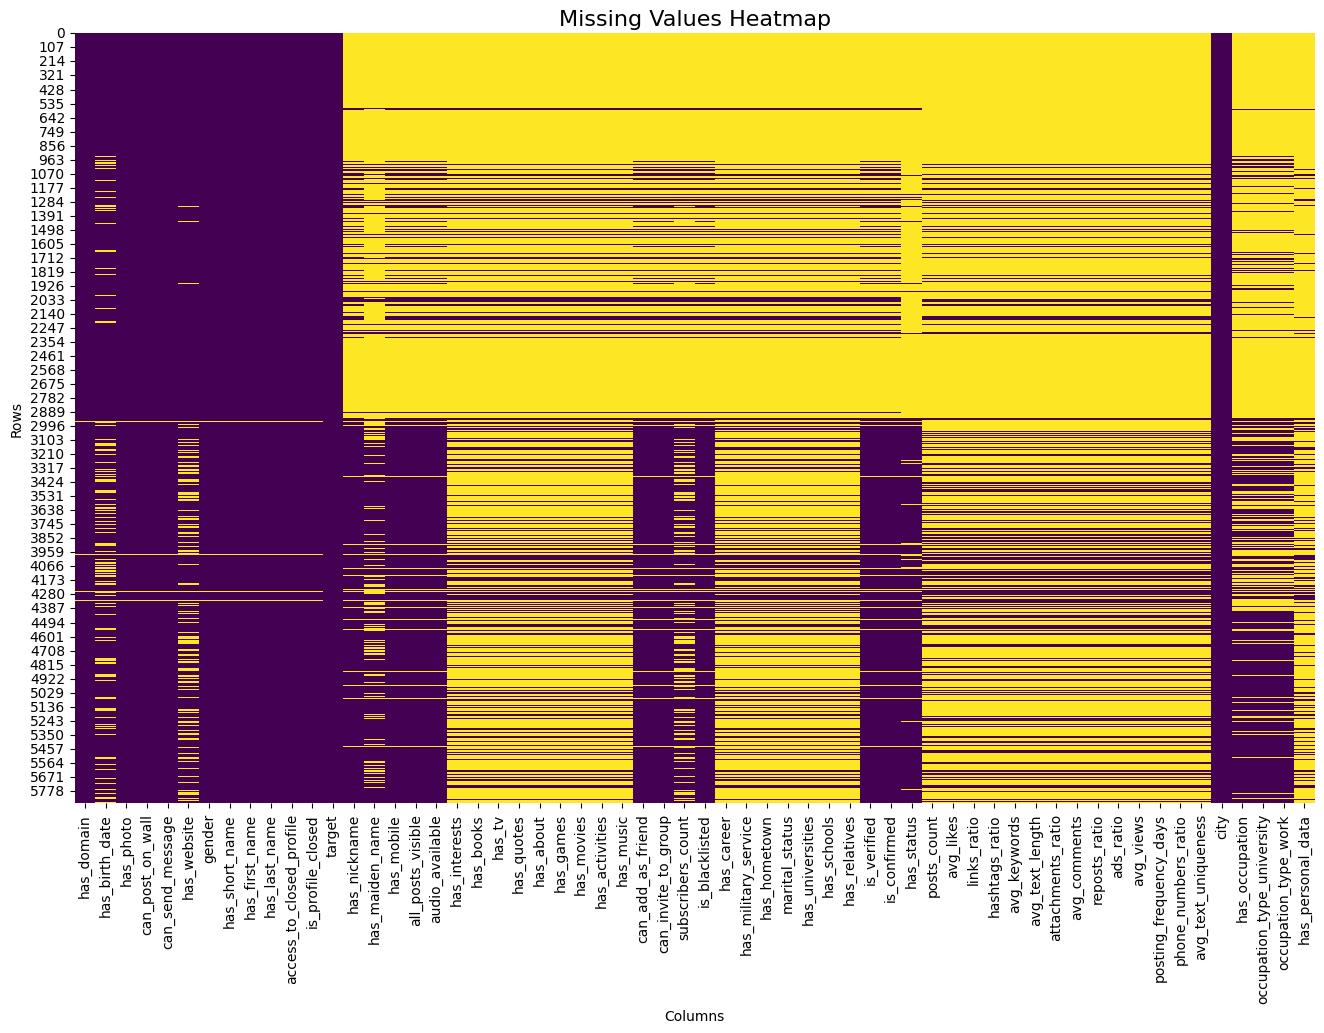

In [11]:
plt.figure(figsize=(16, 10))

sns.heatmap(df.isna(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

There are a lot of null values, I think it would be a good idea to divide the columns according to the amount of NaN values they have and create strategies to handle them in a more special way.

Let's define the percentages...

- Low number of nulls <= 10%.
- Medium number of nulls > 10% < 50%.
- High number of nulls > 50%

In [12]:
null_percent = df.isna().mean() * 100

low_nulls = null_percent[null_percent <= 10].sort_values()
mid_nulls = null_percent[(null_percent > 10) & (null_percent <= 50)].sort_values()
high_nulls = null_percent[null_percent > 50].sort_values()

Let's start by defining the strategy for the low number of nulls.

To do so, let's first see which columns belong to this group

In [13]:
low_nulls

target                      0.00000
city                        0.00000
has_domain                  0.40858
has_photo                   0.40858
can_post_on_wall            0.40858
can_send_message            0.40858
gender                      0.40858
has_short_name              0.40858
has_first_name              0.40858
has_last_name               0.40858
access_to_closed_profile    0.40858
is_profile_closed           0.40858
dtype: float64

Since they have less than 1% of null values, I think it is a good idea to impute them with 0, assuming they do not have this characteristic

In [14]:
for col in low_nulls.index:
    df[col] = df[col].fillna(0.0)

Now let's look at the columns with a mean number of null values

In [15]:
mid_nulls

has_website            12.631937
has_birth_date         14.572693
has_nickname           43.513790
has_mobile             43.513790
all_posts_visible      43.513790
audio_available        43.513790
can_add_as_friend      43.513790
can_invite_to_group    43.513790
is_blacklisted         43.513790
is_verified            43.513790
is_confirmed           43.513790
dtype: float64

Ok, for this case, we are already talking about a higher number of nulls, which vary between 12% and 43%.

For this case, I think the best thing to do is to fill these null values with zeros and create a column indicating that this value was missing.

Why I think this is the best option, is mostly to not lose important information that this can offer us and leave a flag that indicates to our model that these values were actually null.

In [16]:
for col in mid_nulls.index:
    df[col+'_missing'] = df[col].isna().astype('int')
    df[col] = df[col].fillna(0.0)

Now, let's take a look at the columns with more than 50% of the null values

In [17]:
high_nulls

has_status                    50.459653
subscribers_count             55.737147
has_maiden_name               58.154580
occupation_type_university    59.533538
has_occupation                59.533538
occupation_type_work          59.533538
posts_count                   76.319374
links_ratio                   76.319374
hashtags_ratio                76.319374
avg_keywords                  76.319374
avg_text_length               76.319374
attachments_ratio             76.319374
reposts_ratio                 76.319374
ads_ratio                     76.319374
avg_views                     76.319374
posting_frequency_days        76.319374
phone_numbers_ratio           76.319374
avg_text_uniqueness           76.319374
avg_comments                  76.319374
avg_likes                     76.319374
has_tv                        78.328226
has_relatives                 78.328226
has_schools                   78.328226
has_universities              78.328226
marital_status                78.328226


Well, here the thing is a little juicier, so let's identify which columns are useful, which are not and what is the strategy we are going to use.

I see that there are quite a few columns that are optional profile type, which have a lot of nulls and although they can be data that help us to refine our model, the lack of data in this case make them a little useless, so we are going to remove them

In [18]:
drop_cols = [
    'has_books', 'has_quotes', 'has_about', 'has_movies', 'has_games',
    'has_activities', 'has_music', 'has_tv', 'has_career', 'has_maiden_name',
    'has_interests', 'has_military_service', 'has_hometown'
]

df = df.drop(columns=drop_cols)

Now, we see that there are quite a few continuous numerical columns, which can be quite useful for our model.

For these, we will impute the null values with the median to maintain the trends and create a flag for the model to identify that it was a missing value.

In [19]:
num_high_nulls = [
    'posts_count', 'avg_likes', 'avg_comments', 'avg_views',
    'links_ratio', 'hashtags_ratio', 'avg_keywords', 'avg_text_length',
    'attachments_ratio', 'reposts_ratio', 'ads_ratio', 'can_invite_to_group',
    'posting_frequency_days', 'phone_numbers_ratio', 'avg_text_uniqueness', 'subscribers_count'
]

for col in num_high_nulls:
    df[col+'_missing'] = df[col].isna().astype('int')
    df[col] = df[col].fillna(df[col].median())

Now, let's look at the columns that are boolean or categorical, which provide value and we can impute them with 0 and add the column that indicate missing values

In [20]:
bool_high_cats = [
    'has_status', 'has_personal_data', 'has_relatives',
    'has_schools', 'has_universities',
    'occupation_type_university', 'occupation_type_work', 'has_occupation'
]

for col in bool_high_cats:
    df[col+'_missing'] = df[col].isna().astype('int')
    df[col] = df[col].fillna(0.0)

There are other categorical columns that seem to have a specific meaning, and we could not impute them with 0, since we do not know if 0 is a valid value for this category, so we will impute it with the mode and add, of course, its column indicating if it was a missing value.

In [21]:
df['marital_status_missing'] = df['marital_status'].isna().astype('int')
df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0])

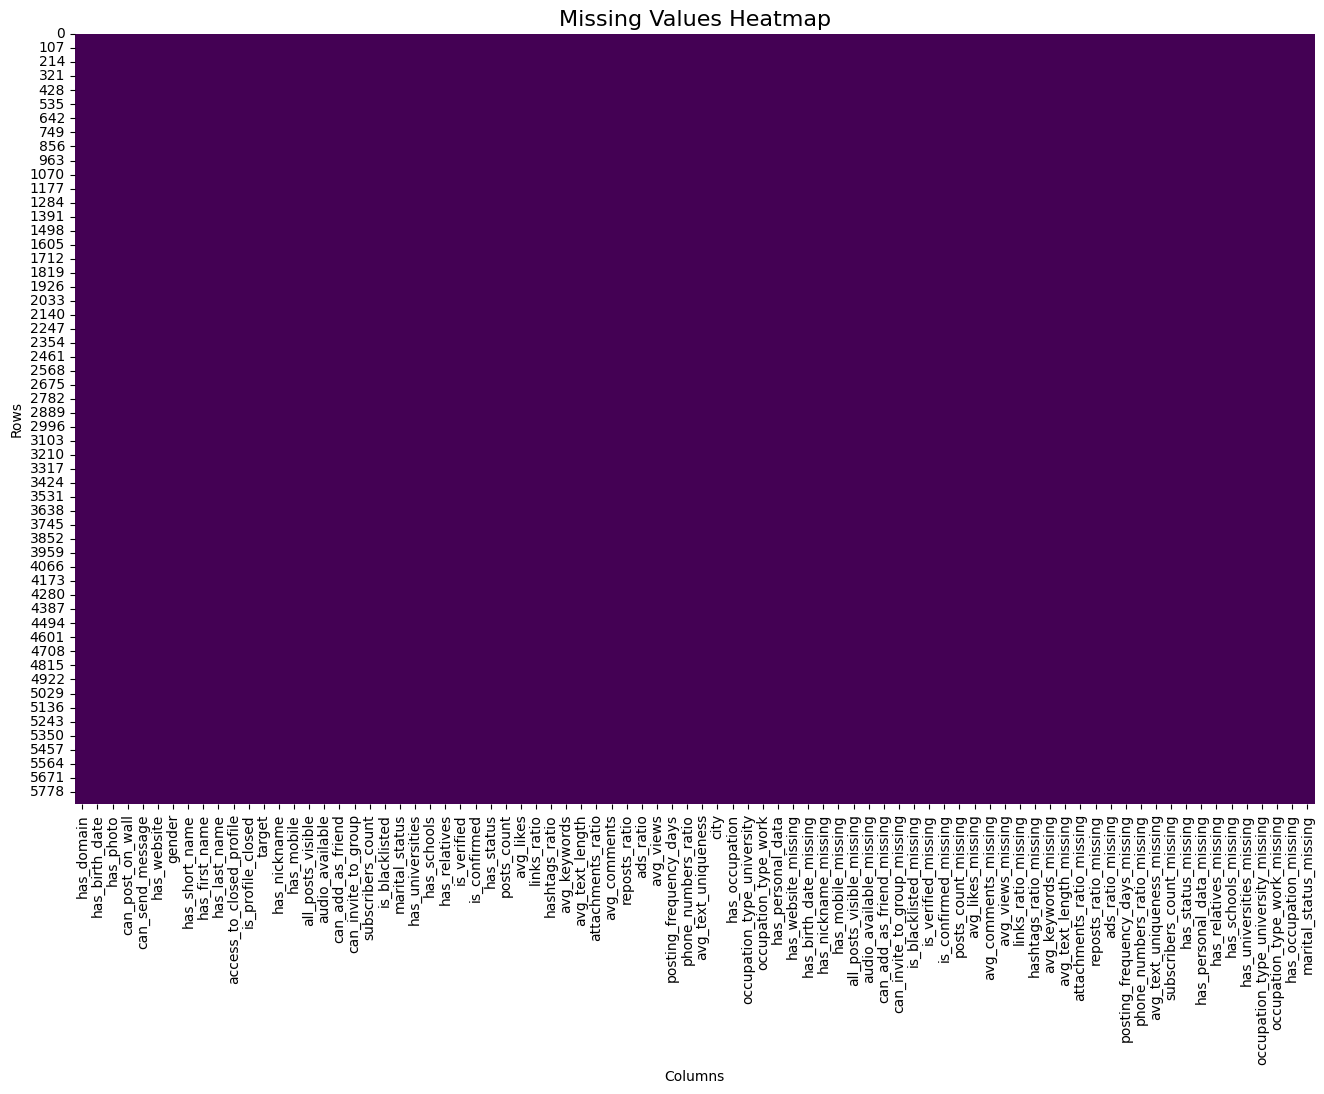

In [22]:
plt.figure(figsize=(16, 10))

sns.heatmap(df.isna(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Let's see what we can do with the city column, since it has a high cardinality and is not a good candidate for One Hot Encoding.

In [23]:
df['city'].unique().shape

(362,)

Let's take a look at the most frequent cities

In [24]:
top_cities = df['city'][df['city'] != 'Unknown'].value_counts().nlargest(10).index
top_cities

Index(['Saint Petersburg', 'Kostomuksha', 'Moscow', 'Petrozavodsk',
       'Nizhny Novgorod', 'Yekaterinburg', 'Vladivostok', 'Rostov-on-Don',
       'Krasnodar', 'Perm'],
      dtype='object', name='city')

now, let's place the other countries that are not in the top 10, together with the unknown ones on a different side, grouping them as “others”.

In [25]:
df['city_grouped'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')

Now, we can do a One Hot Encoding to the cities

In [26]:
df = pd.get_dummies(df, columns=['city_grouped'], drop_first=True)

Let's check for duplicate data

In [27]:
df.duplicated().sum()

2655

In [28]:
df = df.drop_duplicates().reset_index(drop=True)

Let's see if there are columns with constant values that do not contribute anything to us

In [29]:
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df = df.drop(columns=constant_cols)

Perfect, now that we have handled the null values and cleaned up all our data, we can continue with our project.

In [30]:
df = df.reset_index(drop=True)

# Data Exploratory Analysis

## Target Distribution

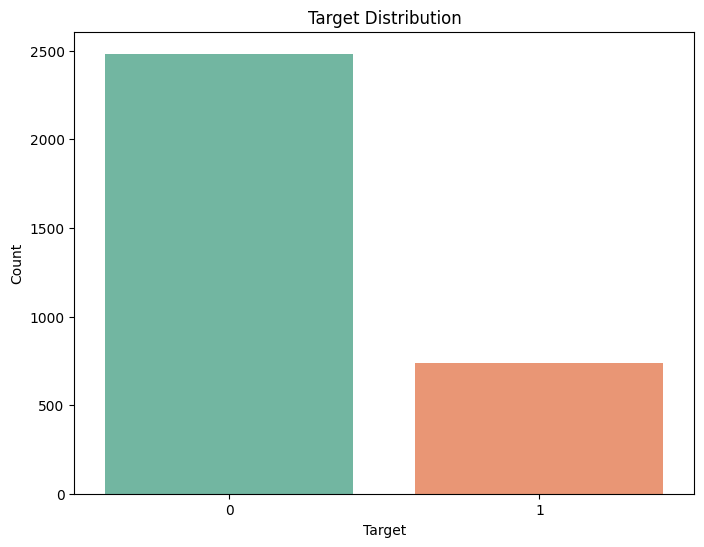

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [32]:
df['target'].value_counts(normalize=True)

target
0    0.771358
1    0.228642
Name: proportion, dtype: float64

## Correlations

Let's filter the variables to which we are going to correlate the missing variables flag columns

In [33]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
numerical_features = [col for col in numerical_features if not col.endswith('_missing')]
corr_matrix = df[numerical_features].corr()

threshold = 0.3
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols_with_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]

Let's look at the variables with a correlation level greater than 0.3.

<Figure size 1800x1400 with 0 Axes>

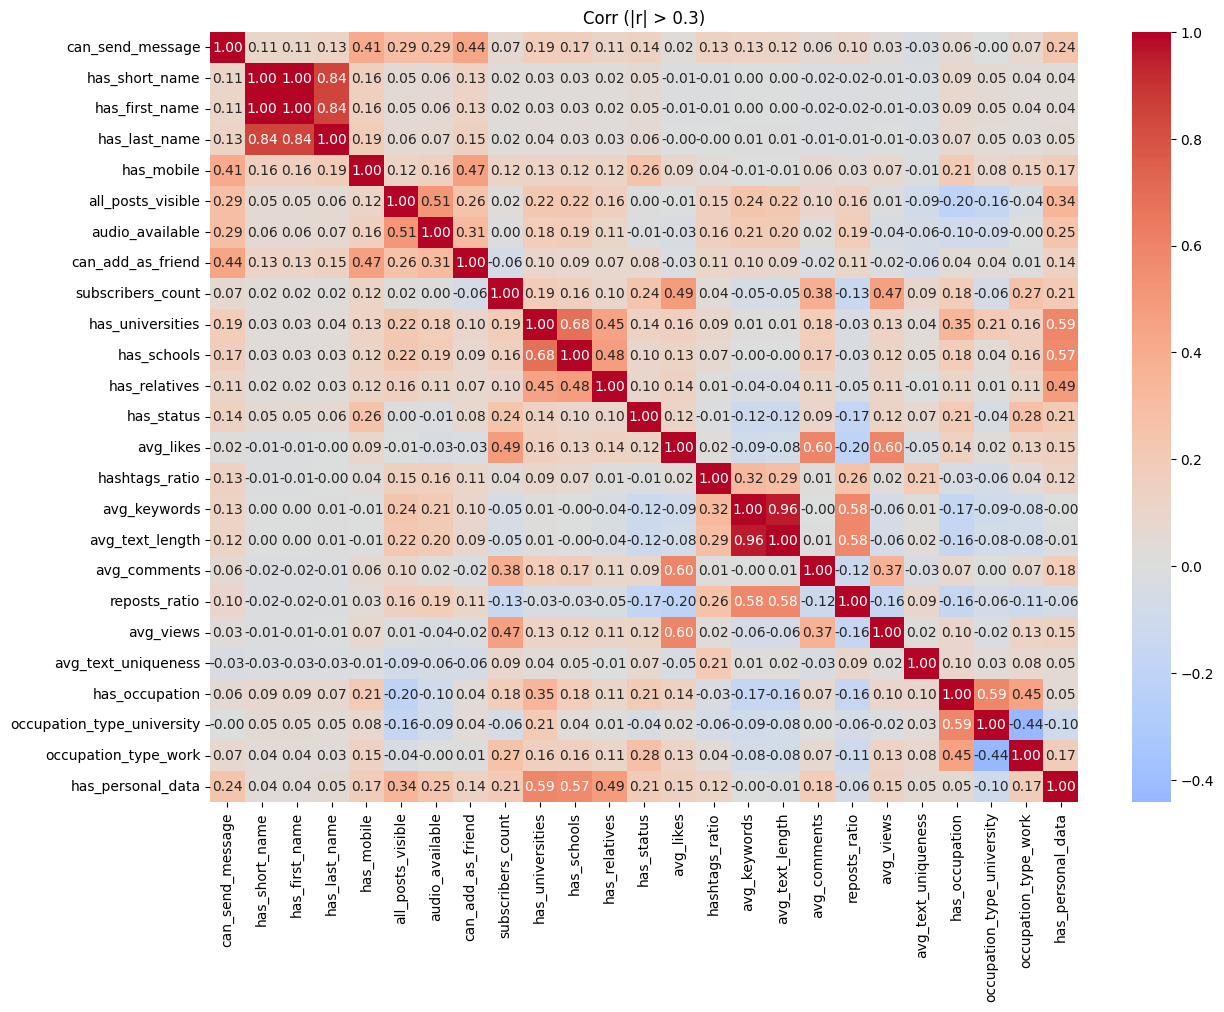

In [34]:
filtered_corr = df[cols_with_corr].corr()

plt.figure(figsize=(18, 14))

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Corr (|r| > 0.3)')
plt.show()

Let's see which are the features with the highest correlation with our target variable, which is “Target”.

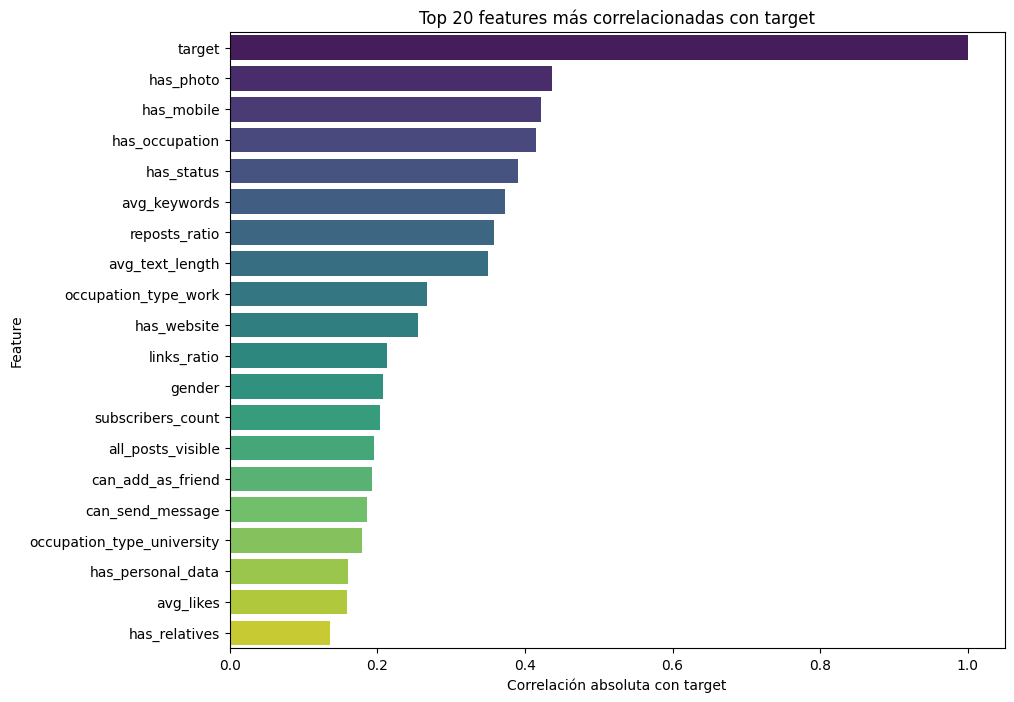

In [35]:
target_corr = df[numerical_features].corrwith(df['target'])

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=target_corr_sorted[:20], y=target_corr_sorted[:20].index, palette='viridis')
plt.title('Top 20 features más correlacionadas con target')
plt.xlabel('Correlación absoluta con target')
plt.ylabel('Feature')
plt.show()

let's see how the variables are distributed, which makes me a little curious as to how they are distributed. 

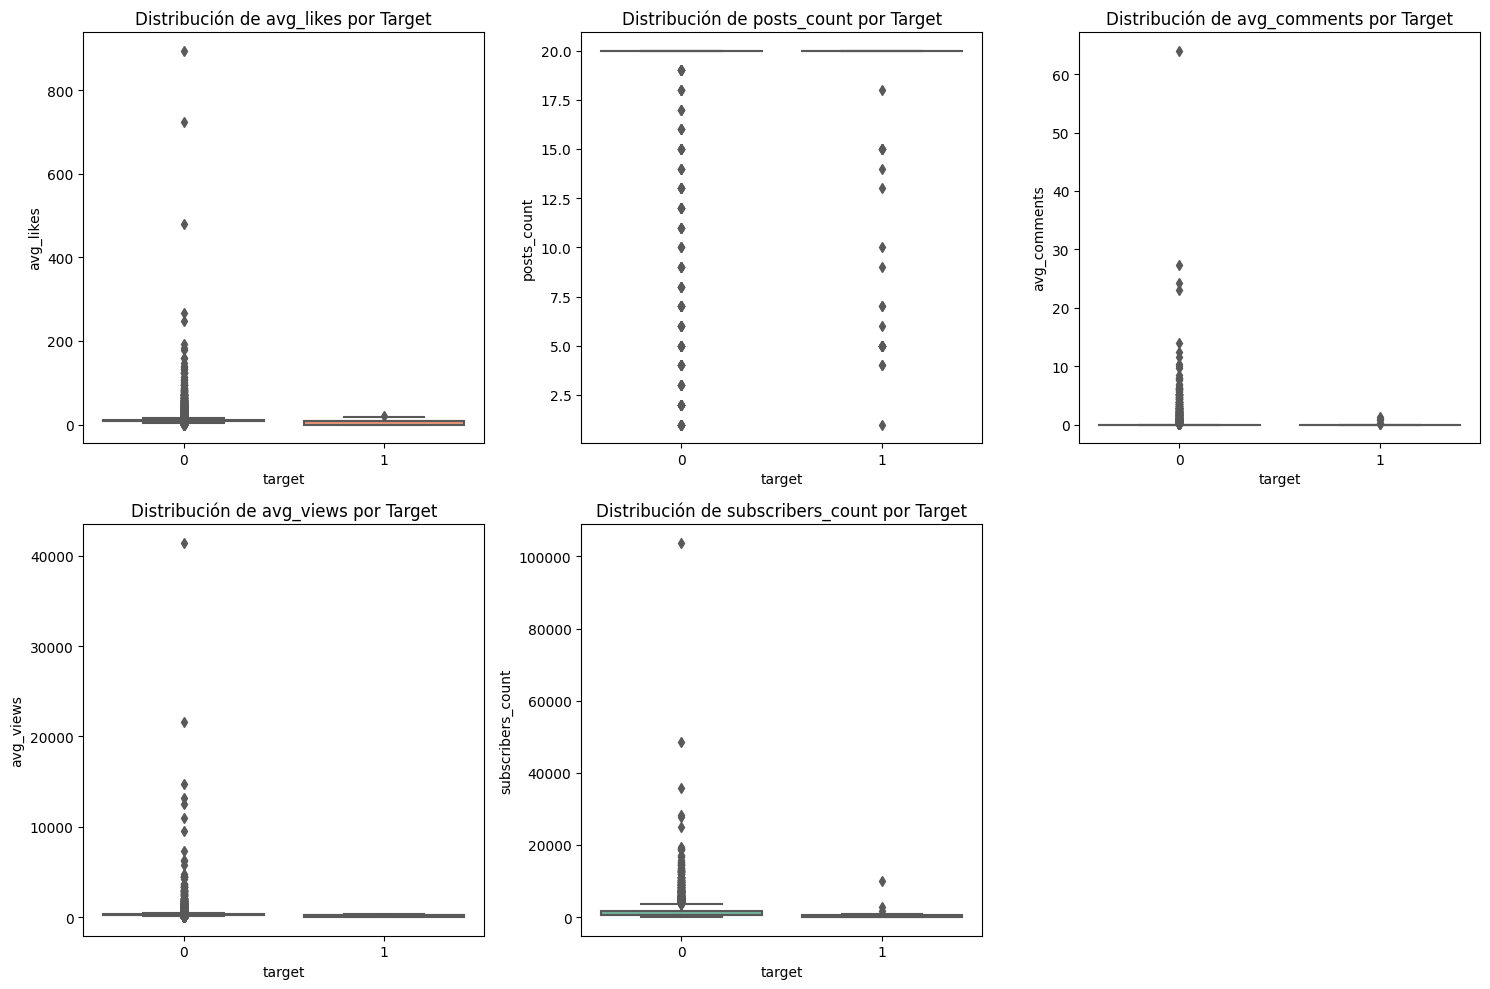

In [36]:
key_columns = ['avg_likes', 'posts_count', 'avg_comments', 'avg_views', 'subscribers_count']

plt.figure(figsize=(15, 10))

for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=col, data=df, palette='Set2')
    plt.title(f'Distribución de {col} por Target')

plt.tight_layout()
plt.show()


# ML Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

## Features

Let's take the top features most related to taget

In [38]:
test_1_features = target_corr_sorted[:20].index
test_1_features = test_1_features.drop('target')

## Train Test Split

In [39]:
X = df[test_1_features]
y = df.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y, test_size=0.2
)

## Desicion Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

Let's set up a grid for the automation of hyperparameters 

In [42]:
param_grid_tree = {
    'max_depth': [3, 5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_leaf_nodes': [None, 10, 25, 50, 100, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [43]:
tree_model = DecisionTreeClassifier(random_state=1)

random_search_tree = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_grid_tree,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

random_search_tree.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 25, 50,
                                                           100, 250, 500],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [44]:
best_tree = random_search_tree.best_estimator_
tree_preds = best_tree.predict(X_test)

In [45]:
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))
print("ROC AUC:", roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[482  15]
 [ 16 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       497
           1       0.90      0.89      0.89       147

    accuracy                           0.95       644
   macro avg       0.93      0.93      0.93       644
weighted avg       0.95      0.95      0.95       644

ROC AUC: 0.9664928345583707


Ok, we see that the model is quite good, with a ROC AUC of 96.64% and a precision of 90%.

let's see if we can improve it

First let's look at what are the most important features for the model

In [46]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_tree.feature_importances_
}).sort_values(by='importance', ascending=False)

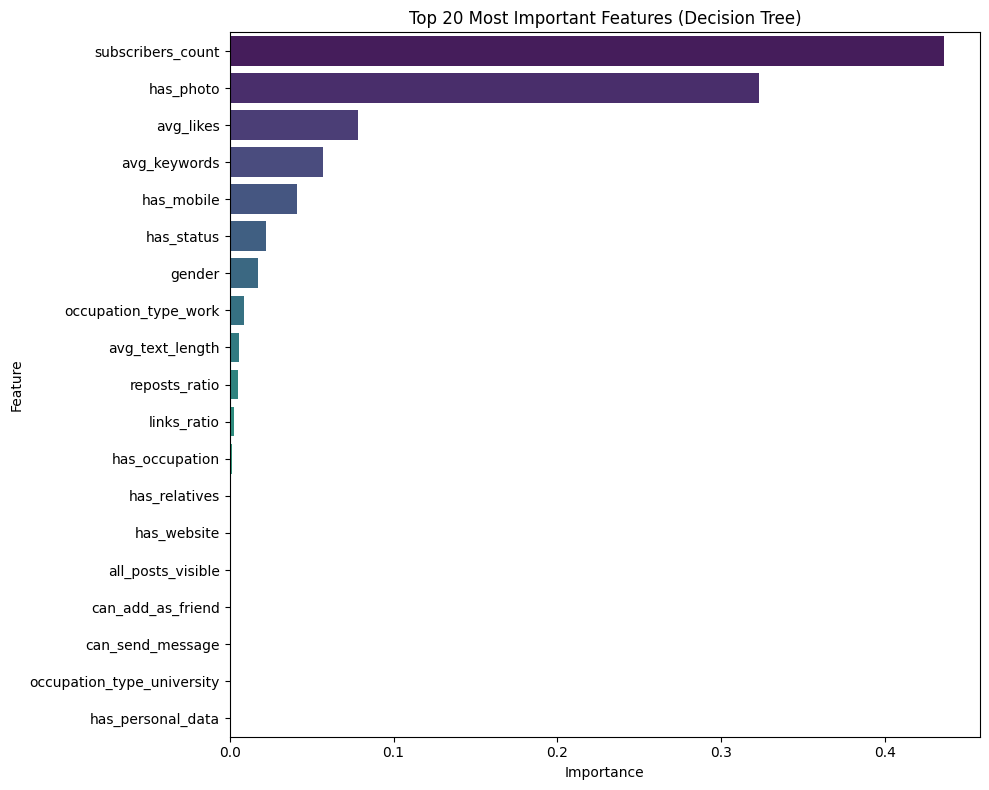

In [47]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

let's take the first 10

In [48]:
top_features = feature_importances.head(10)['feature'].tolist()
X = df[top_features]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1
)

In [50]:
tree_model = DecisionTreeClassifier(random_state=1)

random_search_tree = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_grid_tree,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

random_search_tree.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 25, 50,
                                                           100, 250, 500],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [51]:
best_tree = random_search_tree.best_estimator_
tree_preds = best_tree.predict(X_test)

In [52]:
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))
print("ROC AUC:", roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[596  21]
 [ 21 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       617
           1       0.89      0.89      0.89       188

    accuracy                           0.95       805
   macro avg       0.93      0.93      0.93       805
weighted avg       0.95      0.95      0.95       805

ROC AUC: 0.9586882306286424


We see that with fewer features it is not more accurate, in fact, under 1% in its accuracy and its ROC AUC.

Let's try another model

## Random Forest Classifier

In [53]:
X = df[test_1_features]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y, test_size=0.2
)

We create our grid for the hyperparameters

In [55]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [56]:
rf_model = RandomForestClassifier(random_state=1)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

In [57]:
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [58]:
best_rf = random_search_rf.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_probas = best_rf.predict_proba(X_test)[:, 1]

In [59]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_probas))

Confusion Matrix:
 [[485  12]
 [ 18 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       497
           1       0.91      0.88      0.90       147

    accuracy                           0.95       644
   macro avg       0.94      0.93      0.93       644
weighted avg       0.95      0.95      0.95       644

ROC AUC: 0.9791606783558494


Ok, that's a very significant improvement.

Now we have a 92% accuracy and a ROC AUC of 98.25% is quite impressive.

Let's see if we can improve it

In [60]:
feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

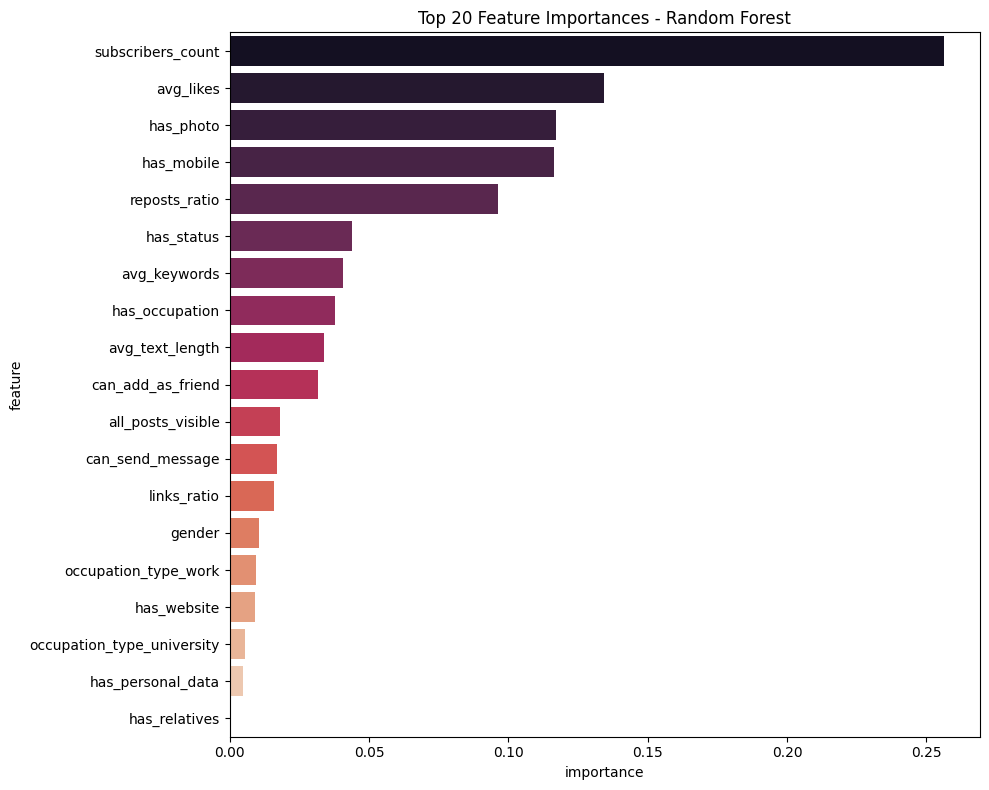

In [61]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feat_importances.head(20), palette='rocket')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [62]:
top_features = feature_importances.head(15)['feature'].tolist()
X = df[top_features]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y, test_size=0.2
)

In [64]:
rf_model = RandomForestClassifier(random_state=1)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

In [65]:
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [66]:
best_rf = random_search_rf.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_probas = best_rf.predict_proba(X_test)[:, 1]

In [67]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_probas))

Confusion Matrix:
 [[485  12]
 [ 17 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       497
           1       0.92      0.88      0.90       147

    accuracy                           0.95       644
   macro avg       0.94      0.93      0.94       644
weighted avg       0.95      0.95      0.95       644

ROC AUC: 0.9825757264676493


Apparently I made almost no, if not no impact on performance, which makes it a totally solid model.

Now, let's try adding the variables of the cities and flags we created to identify the missing values to see if it has any impact.

In [68]:
cities = ['city_grouped_Krasnodar',
       'city_grouped_Moscow', 'city_grouped_Nizhny Novgorod',
       'city_grouped_Other', 'city_grouped_Perm', 'city_grouped_Petrozavodsk',
       'city_grouped_Rostov-on-Don', 'city_grouped_Saint Petersburg',
       'city_grouped_Vladivostok', 'city_grouped_Yekaterinburg']
missing_values = ['has_mobile_missing', 'has_occupation_missing', 'has_status_missing',
       'avg_keywords_missing', 'reposts_ratio_missing', 'avg_text_length_missing',
       'occupation_type_work_missing', 'has_website_missing', 'links_ratio_missing',
       'subscribers_count_missing', 'all_posts_visible_missing', 'can_add_as_friend_missing',
       'occupation_type_university_missing', 'has_personal_data_missing',
       'avg_likes_missing', 'has_relatives_missing']
test_1_features

Index(['has_photo', 'has_mobile', 'has_occupation', 'has_status',
       'avg_keywords', 'reposts_ratio', 'avg_text_length',
       'occupation_type_work', 'has_website', 'links_ratio', 'gender',
       'subscribers_count', 'all_posts_visible', 'can_add_as_friend',
       'can_send_message', 'occupation_type_university', 'has_personal_data',
       'avg_likes', 'has_relatives'],
      dtype='object')

In [69]:
X = df[list(test_1_features) + missing_values + cities]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y, test_size=0.2
)

In [71]:
rf_model = RandomForestClassifier(random_state=1)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

In [72]:
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [73]:
best_rf = random_search_rf.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_probas = best_rf.predict_proba(X_test)[:, 1]

In [74]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_probas))

Confusion Matrix:
 [[486  11]
 [ 21 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       497
           1       0.92      0.86      0.89       147

    accuracy                           0.95       644
   macro avg       0.94      0.92      0.93       644
weighted avg       0.95      0.95      0.95       644

ROC AUC: 0.9839992334962153


It improved its ROC AUC from 98.25% to 98.39%, low recall but something that can be improved by adjusting the treshold.

Let's see which are the most important features for the model.

In [75]:
feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

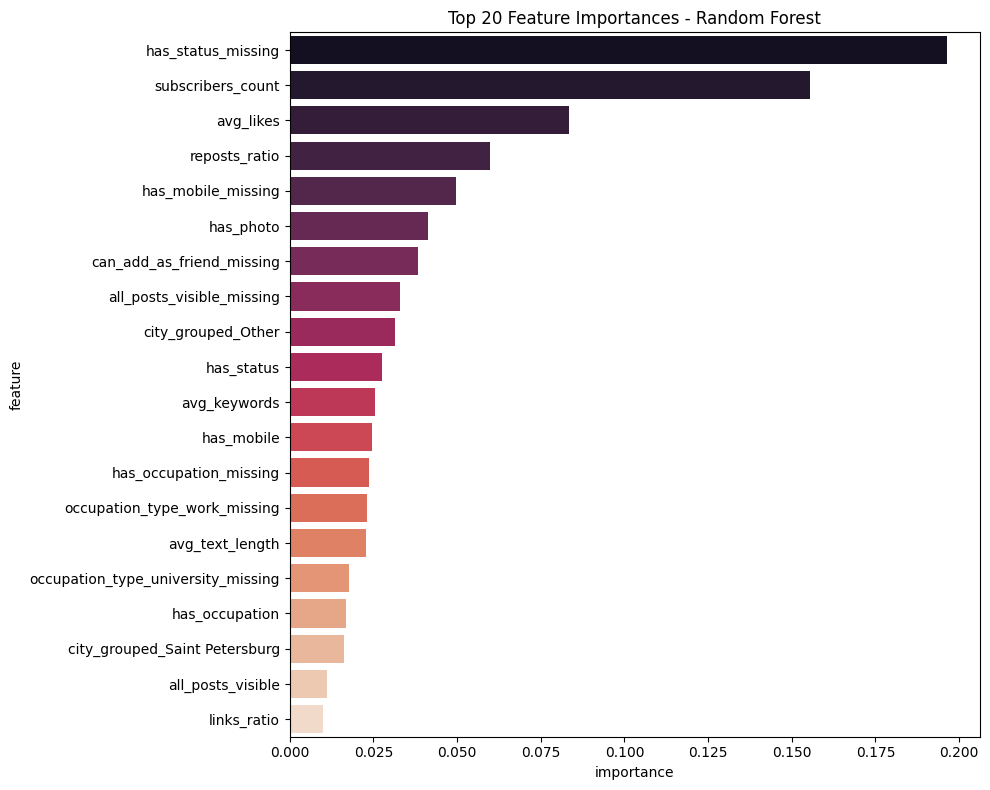

In [76]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feat_importances.head(20), palette='rocket')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

Ok, we see that the top of the most important features has completely changed and among them is included the one of the city.

Let's see if taking the top 15 of these features improves the model.

In [77]:
top_features = feature_importances.head(15)['feature'].tolist()
X = df[top_features]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y, test_size=0.2
)

In [79]:
rf_model = RandomForestClassifier(random_state=1)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1
)

In [80]:
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [81]:
best_rf = random_search_rf.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_probas = best_rf.predict_proba(X_test)[:, 1]

In [82]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_probas))

Confusion Matrix:
 [[485  12]
 [ 17 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       497
           1       0.92      0.88      0.90       147

    accuracy                           0.95       644
   macro avg       0.94      0.93      0.94       644
weighted avg       0.95      0.95      0.95       644

ROC AUC: 0.9825757264676493


It seems to have returned to its previous performance, which is not a bad thing, it raised its recall but returned to its previous ROC AUC regardless of the fact that they were different features.

# Best Model

For this case, the best predictor model is the Random Forest Classifier with these features!:

In [83]:
cities + missing_values + list(test_1_features)

['city_grouped_Krasnodar',
 'city_grouped_Moscow',
 'city_grouped_Nizhny Novgorod',
 'city_grouped_Other',
 'city_grouped_Perm',
 'city_grouped_Petrozavodsk',
 'city_grouped_Rostov-on-Don',
 'city_grouped_Saint Petersburg',
 'city_grouped_Vladivostok',
 'city_grouped_Yekaterinburg',
 'has_mobile_missing',
 'has_occupation_missing',
 'has_status_missing',
 'avg_keywords_missing',
 'reposts_ratio_missing',
 'avg_text_length_missing',
 'occupation_type_work_missing',
 'has_website_missing',
 'links_ratio_missing',
 'subscribers_count_missing',
 'all_posts_visible_missing',
 'can_add_as_friend_missing',
 'occupation_type_university_missing',
 'has_personal_data_missing',
 'avg_likes_missing',
 'has_relatives_missing',
 'has_photo',
 'has_mobile',
 'has_occupation',
 'has_status',
 'avg_keywords',
 'reposts_ratio',
 'avg_text_length',
 'occupation_type_work',
 'has_website',
 'links_ratio',
 'gender',
 'subscribers_count',
 'all_posts_visible',
 'can_add_as_friend',
 'can_send_message',
 'o

# If you liked my work or found it useful, please upvote or comment if you would like to know more or just want to support!